<a href="https://colab.research.google.com/github/alda1rx/Tareas_EstadisticaAplicada_21/blob/main/LAHM_1616940_EstadisticaAplicadaG51_parcial1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install yfinance

     |████████████████████████████████| 63 kB 797 kB/s 
     |████████████████████████████████| 6.4 MB 37.9 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import numpy as np
import pandas as pd 
import yfinance as yf
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
elektra = yf.download('ELEKTRA.MX', 
                       start='2019-01-01', 
                       end='2022-01-01',
                       progress=False)

In [4]:
elektra.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,958.000000,960.000000,916.989990,956.619995,945.939087,40603
2019-01-03,962.760010,962.760010,936.000000,951.729980,941.103699,23674
2019-01-04,942.090027,969.849976,942.080017,965.429993,954.650757,11312
2019-01-07,967.940002,1020.000000,963.000000,1002.330017,991.138733,31914
2019-01-08,1012.460022,1040.010010,997.010010,1025.030029,1013.585327,42770


In [5]:
elektra.rename(columns = {'Adj Close':'adj_close'}, inplace=True)
elektra['retorno_simple'] = elektra.adj_close.pct_change()

In [6]:
print('Rango de fechas:', min(elektra.index.date), '-', max(elektra.index.date))
print('Numero de observaciones:', elektra.shape[0])
print(f'Media: {elektra.retorno_simple.mean():.4f}')
print(f'Mediana: {elektra.retorno_simple.median():.4f}')
print(f'Mínimo: {elektra.retorno_simple.min():.4f}')
print(f'Máximo: {elektra.retorno_simple.max():.4f}')
print(f'Desviación Estándar: {elektra.retorno_simple.std():.4f}')
print(f'Skewness (símetría): {elektra.retorno_simple.skew():.4f}') 
print(f'Kurtosis: {elektra.retorno_simple.kurtosis():.4f}')    


Rango de fechas: 2019-01-02 - 2021-12-31
Numero de observaciones: 756
Media: 0.0007
Mediana: -0.0003
Mínimo: -0.0359
Máximo: 0.0666
Desviación Estándar: 0.0096
Skewness (símetría): 1.9558
Kurtosis: 9.8369


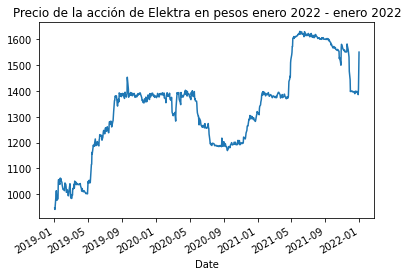

In [7]:
#Precio de la Acción
elektra['adj_close'].plot()
plt.title('Precio de la acción de Elektra en pesos enero 2022 - enero 2022')
plt.show()

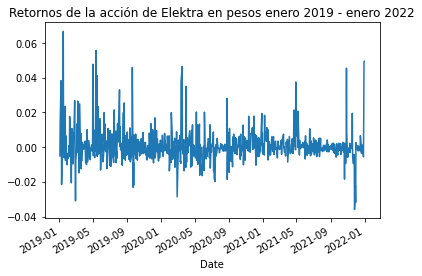

In [8]:
#Retornos de la acción
elektra['retorno_simple'].plot()
plt.title('Retornos de la acción de Elektra en pesos enero 2019 - enero 2022')
plt.show()

In [9]:
#Promedio movil de la acción a 10 días y a 50 días
elektra['MA10'] = elektra['adj_close'].rolling(10).mean()
elektra['MA50'] = elektra['adj_close'].rolling(50).mean()
elektra = elektra.dropna()
elektra.head()

,Open,High,Low,Close,adj_close,Volume,retorno_simple,MA10,MA50
Date,,,,,,,,,
2019-03-13,1045.000000,1097.900024,1010.049988,1034.839966,1023.285706,29201,-0.014870,1004.775751,1015.400604
2019-03-14,1047.589966,1077.050049,1020.460022,1036.979980,1025.401855,40232,0.002068,1008.061646,1016.989860
2019-03-15,1049.589966,1071.390015,1020.000000,1062.729980,1050.864380,193380,0.024832,1014.626520,1019.185073
2019-03-19,1062.000000,1071.400024,1033.010010,1049.439941,1037.722656,63410,-0.012506,1020.040381,1020.846511
2019-03-20,1054.910034,1096.000000,1041.119995,1057.670044,1045.860840,141460,0.007842,1026.045575,1021.940953


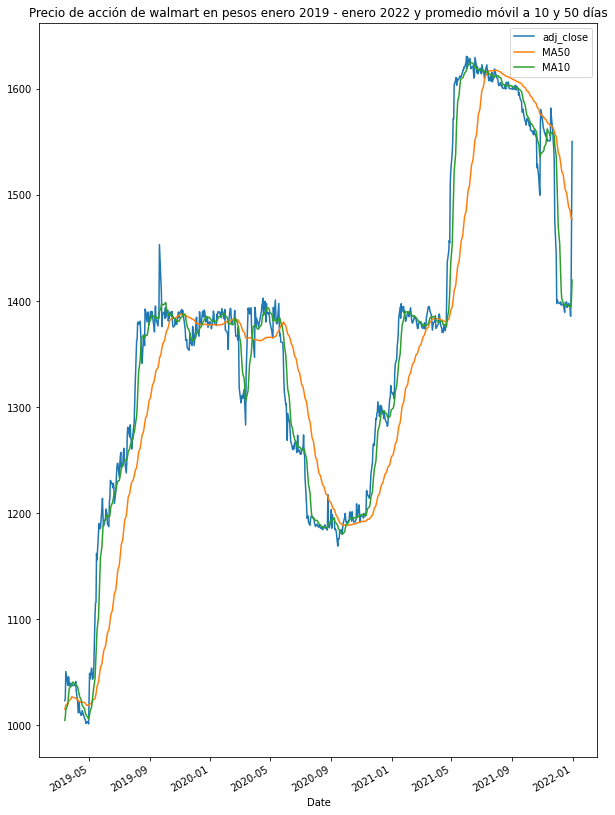

In [10]:
#Grafica del precio de la acción a 10 días y a 50 días
elektra[['adj_close', 'MA50', 'MA10']].plot(figsize=(10,15))
plt.title('Precio de acción de walmart en pesos enero 2019 - enero 2022 y promedio móvil a 10 y 50 días')
plt.show()

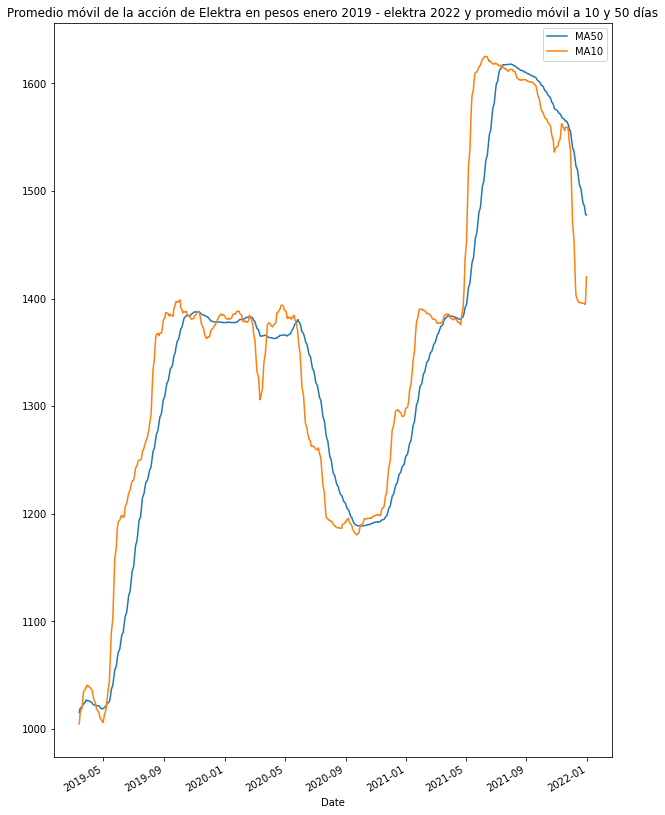

In [11]:
#Grafica del promedio movil de la acción a 10 días y a 50 días
elektra[[ 'MA50', 'MA10']].plot(figsize=(10,15))
plt.title('Promedio móvil de la acción de Elektra en pesos enero 2019 - elektra 2022 y promedio móvil a 10 y 50 días')
plt.show()

In [15]:
elektra['Shares'] = [1 if elektra.loc[ei, 'MA10']>elektra.loc[ei, 'MA50']
                   
                    else 0 
                   
                    for ei in elektra.index]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


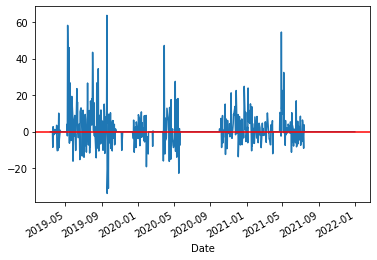

In [16]:
elektra['close_ayer'] = elektra['adj_close'].shift(-1)
elektra['Profit'] = [elektra.loc[ei, 'close_ayer'] - elektra.loc[ei, 'adj_close'] if elektra.loc[ei, 'Shares']==1 else 0 for ei in elektra.index]
elektra['Profit'].plot()
plt.axhline(y=0, color='red')
plt.show()

In [18]:
elektra['ganancia_acumulada'] = elektra['Profit'].cumsum()
elektra.tail()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Open,High,Low,Close,adj_close,Volume,retorno_simple,MA10,MA50,Shares,close_ayer,Profit,ganancia_acumulada
Date,,,,,,,,,,,,,
2021-12-27,1397.989990,1399.959961,1385.000000,1393.770020,1393.770020,89750,-0.003047,1395.361011,1485.716594,0,1385.959961,0.0,605.757935
2021-12-28,1406.000000,1407.500000,1381.599976,1385.959961,1385.959961,146776,-0.005604,1394.470007,1482.211194,0,1408.349976,0.0,605.757935
2021-12-29,1390.979980,1440.000000,1375.000000,1408.349976,1408.349976,87637,0.016155,1396.039001,1479.244993,0,1477.760010,0.0,605.757935
2021-12-30,1419.359985,1494.000000,1380.510010,1477.760010,1477.760010,163816,0.049285,1404.859998,1477.693394,0,1550.660034,0.0,605.757935
2021-12-31,1488.000000,1561.229980,1442.000000,1550.660034,1550.660034,174968,0.049331,1420.069006,1477.615195,0,NaN,0.0,605.757935


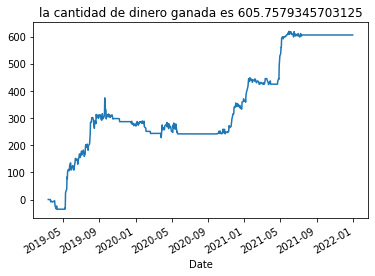

In [19]:
#Grafica de la ganacia acumulada del periodo

elektra['ganancia_acumulada'].plot()
plt.title('la cantidad de dinero ganada es {}'.format(elektra.loc[elektra.index[-2], 'ganancia_acumulada']))
plt.show()

Como **conclusion** podemos mencionar lo siguiente:


Generando el calculo, obtenemos una **ganancia de $605.76 pesos.**


Referente a lo mencionado sobre el promedio móvil en este caso, basandonos en eso, si contaramos con ella se recomienda segun la estrategia vender o no comprarla, sin embargo basandonos en los datos historicos podemos observar que tiene una tendencia positiva o continua, es decir, en la mayoria de las veces es una ganancia o mantenerse al mismo nivel, por lo cual tambien podemos observar que despues de una baja en los precios, tendremos una alsa muy grande que nos hara recuperarnos y obtener ganancia de la misma 
Hay que recordar que entre inversionistas se dice que uno de los mejores momentos para comprar inversiones confiables es despues de un desplome cuando muchos venden a precios bajos 
